In [12]:
import ccxt
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import talib

from pathlib import Path
from tqdm.notebook import tqdm

In [13]:
millis = {
    '1m': 60_000,
    '1h': 60_000 * 60,
    '1d': 60_000 * 1440
}

sym = 'XBTUSD'
level = '1m'
limit = 1000
since = None # get latest OHLC data

api = ccxt.bitmex()

candles = []

while True:     
    
    
    response = api.fetchOHLCV(
        sym,
        since=since,
        limit=limit,
        timeframe=level,
    )
    candles = response + candles
    min_time = min(x[0] for x in response)
    since = min_time - limit * millis[level]
    
    if len(candles) >= 20_000:
        break
    

columns = 'time open high low close vol'.split()
df = pd.DataFrame(candles, columns=columns)

df = df.drop_duplicates()
df = df.sort_values('time')
df = df.reset_index(drop=True)

def to_datetime(x):
    return datetime.datetime.fromtimestamp(x / 1000)

df['time'] = df['time'].apply(to_datetime)
df

,time,open,high,low,close,vol
0,2023-04-09 23:24:00,28157.0,28157.0,28153.5,28155.0,338700.0
1,2023-04-09 23:25:00,28155.0,28175.0,28155.0,28174.5,138500.0
2,2023-04-09 23:26:00,28174.5,28175.0,28174.5,28174.5,2400.0
3,2023-04-09 23:27:00,28174.5,28191.0,28175.0,28189.0,152800.0
4,2023-04-09 23:28:00,28189.0,28188.5,28179.5,28185.0,201800.0
...,...,...,...,...,...,...
19995,2023-04-23 20:39:00,27450.5,27474.5,27453.5,27474.5,25600.0
19996,2023-04-23 20:40:00,27474.5,27490.0,27475.0,27490.0,49600.0
19997,2023-04-23 20:41:00,27490.0,27496.0,27488.0,27495.5,79900.0
19998,2023-04-23 20:42:00,27495.5,27523.0,27496.0,27519.5,1288400.0


In [14]:
df['ema'] = talib.EMA(df['close'])
df

,time,open,high,low,close,vol,ema
0,2023-04-09 23:24:00,28157.0,28157.0,28153.5,28155.0,338700.0,NaN
1,2023-04-09 23:25:00,28155.0,28175.0,28155.0,28174.5,138500.0,NaN
2,2023-04-09 23:26:00,28174.5,28175.0,28174.5,28174.5,2400.0,NaN
3,2023-04-09 23:27:00,28174.5,28191.0,28175.0,28189.0,152800.0,NaN
4,2023-04-09 23:28:00,28189.0,28188.5,28179.5,28185.0,201800.0,NaN
...,...,...,...,...,...,...,...
19995,2023-04-23 20:39:00,27450.5,27474.5,27453.5,27474.5,25600.0,27450.330431
19996,2023-04-23 20:40:00,27474.5,27490.0,27475.0,27490.0,49600.0,27452.889758
19997,2023-04-23 20:41:00,27490.0,27496.0,27488.0,27495.5,79900.0,27455.638806
19998,2023-04-23 20:42:00,27495.5,27523.0,27496.0,27519.5,1288400.0,27459.758883


<AxesSubplot:xlabel='time'>

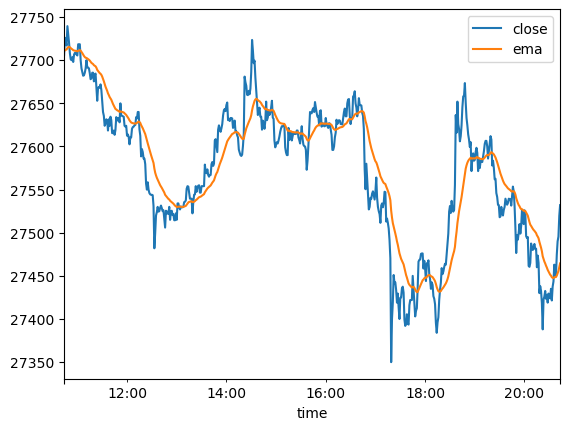

In [15]:
df[-600:].plot(x='time', y=['close', 'ema'])

In [16]:
df['dist'] = np.log(df['close']) - np.log(df['ema'])
df = df.dropna().reset_index(drop=True)
df

,time,open,high,low,close,vol,ema,dist
0,2023-04-09 23:53:00,28422.5,28449.5,28382.5,28384.5,592200.0,28310.483333,0.002611
1,2023-04-09 23:54:00,28384.5,28414.5,28376.5,28414.5,199400.0,28317.194086,0.003430
2,2023-04-09 23:55:00,28414.5,28459.5,28414.0,28430.0,597700.0,28324.471887,0.003719
3,2023-04-09 23:56:00,28430.0,28460.0,28430.0,28442.0,356200.0,28332.054346,0.003873
4,2023-04-09 23:57:00,28442.0,28464.5,28441.5,28441.5,296700.0,28339.115356,0.003606
...,...,...,...,...,...,...,...,...
19966,2023-04-23 20:39:00,27450.5,27474.5,27453.5,27474.5,25600.0,27450.330431,0.000880
19967,2023-04-23 20:40:00,27474.5,27490.0,27475.0,27490.0,49600.0,27452.889758,0.001351
19968,2023-04-23 20:41:00,27490.0,27496.0,27488.0,27495.5,79900.0,27455.638806,0.001451
19969,2023-04-23 20:42:00,27495.5,27523.0,27496.0,27519.5,1288400.0,27459.758883,0.002173


<AxesSubplot:ylabel='Frequency'>

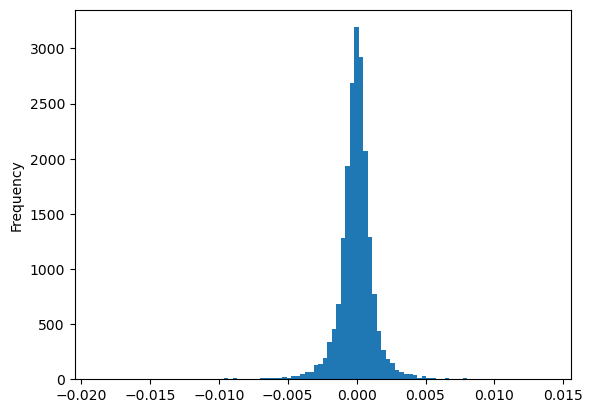

In [17]:
df['dist'].plot(kind='hist', bins=100)

In [18]:
mean = np.mean(df['dist'])
stdev = np.std(df['dist'])

df['z_score'] = (df['dist'] - mean) / stdev
df

,time,open,high,low,close,vol,ema,dist,z_score
0,2023-04-09 23:53:00,28422.5,28449.5,28382.5,28384.5,592200.0,28310.483333,0.002611,1.819120
1,2023-04-09 23:54:00,28384.5,28414.5,28376.5,28414.5,199400.0,28317.194086,0.003430,2.384969
2,2023-04-09 23:55:00,28414.5,28459.5,28414.0,28430.0,597700.0,28324.471887,0.003719,2.584121
3,2023-04-09 23:56:00,28430.0,28460.0,28430.0,28442.0,356200.0,28332.054346,0.003873,2.690707
4,2023-04-09 23:57:00,28442.0,28464.5,28441.5,28441.5,296700.0,28339.115356,0.003606,2.506471
...,...,...,...,...,...,...,...,...,...
19966,2023-04-23 20:39:00,27450.5,27474.5,27453.5,27474.5,25600.0,27450.330431,0.000880,0.623702
19967,2023-04-23 20:40:00,27474.5,27490.0,27475.0,27490.0,49600.0,27452.889758,0.001351,0.948822
19968,2023-04-23 20:41:00,27490.0,27496.0,27488.0,27495.5,79900.0,27455.638806,0.001451,1.017828
19969,2023-04-23 20:42:00,27495.5,27523.0,27496.0,27519.5,1288400.0,27459.758883,0.002173,1.516753


In [19]:
np.mean(df['z_score']), np.std(df['z_score'])

(-1.4231490376247562e-17, 0.9999999999999966)

<AxesSubplot:ylabel='Frequency'>

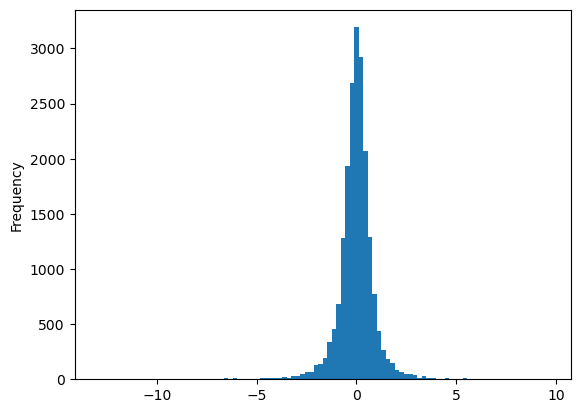

In [20]:
df['z_score'].plot(kind='hist', bins=100)

In [21]:
total = len(df)

rows = []

for z in np.arange(1, 4.1, 0.1):
    count = sum(df['z_score'] > z) + sum(df['z_score'] < -z)
    rows.append({
        'z_score': z,
        'pct': 100 * (count / total)
    })


pd.DataFrame(rows)

,z_score,pct
0,1.0,16.228531
1,1.1,13.774974
2,1.2,11.837164
3,1.3,10.385058
4,1.4,9.023083
5,1.5,7.876421
6,1.6,6.995143
7,1.7,6.193981
8,1.8,5.548045
9,1.9,4.947173


## Trading Idea  

- If z_score > 3 sell 200
- reduce position by 100 when z_score < 2
- close position when z_score < 1  

And vice-versa

- If z_score < -3 buy 200
- reduce position by 100 when z_score > -2
- close position when z_score > -1

<AxesSubplot:xlabel='time'>

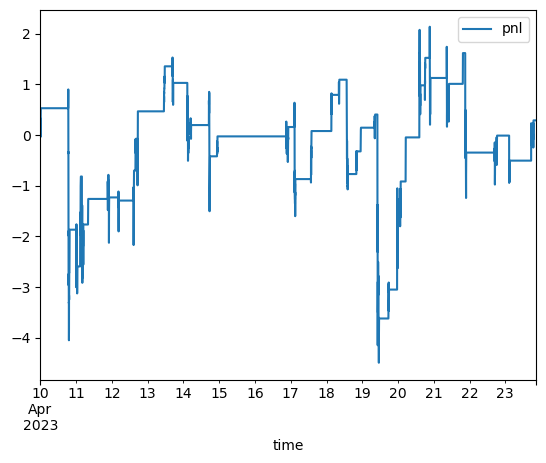

In [22]:
trading_fee = 7.5 / 100 / 100
trading_fee = 0

sig_thres = 3
cls_thres = 0.5


risk = 0

position = []
fees = []


for r in df.itertuples():
    # have no risk
    fee = 0
    
    if risk == 0:
        if r.z_score > sig_thres:
            risk = -200
            fee = 200 * trading_fee
            
        elif r.z_score < -sig_thres:
            risk = 200
            fee = 200 * trading_fee
            
    # have short risk - triggered by z_score > 3
    elif risk == -200:
        if r.z_score < cls_thres:
            risk = 0
            fee = 200 * trading_fee
    
#     elif risk == -100:
#         if r.z_score < 1:
#             risk = 0
#             fee = 100 * taker_fee
    
    # have long risk - triggered by z_score < -3    
    elif risk == 200:
        if r.z_score > -cls_thres:
            risk = 0
            fee = 200 * trading_fee
    
#     elif risk == 100:
#         if r.z_score > -1:
#             risk = 0
#             fee = 100 * taker_fee
            
    
    position.append(risk)
    fees.append(fee)
    

df['risk'] = position
df['fee'] = fees


df['change'] = df['close'].pct_change().shift(-1).fillna(0)

df['pnl'] = (df['change'] * df['risk']) - df['fee'] 
df['pnl'] = df['pnl'].cumsum()


df.plot(x='time', y='pnl')